In [4]:
%reload_ext autoreload
%autoreload 2
import numpy as np, sys, os, pandas as pd,json, os
sys.path.insert(1, '../../')
from getting_data import read_conf

In [5]:
_, samples, __ = read_conf('.')

sv = []
bv = []

for sample_key in samples.keys():
    sample_tasks = samples[sample_key]['smpshap']['task']
    for task in sample_tasks:
        rg = task['range']
        m_file = os.path.join('scores', f"{sample_key}_shap_sampling_{rg[0]}_{rg[1]}.npz")
        if os.path.exists(m_file):
            ld = np.load(m_file)
            
            shap_values = ld['shap_values']
            base_values = ld['base_values']
            
            sv.extend(shap_values)
            bv.extend(base_values)

In [14]:
from shapley_value import feature_key_list
from s2search_score_pdp import pdp_based_importance

sv = np.flipud(np.rot90(np.array(sv)))

std_fi = []
pdp_based_fi = []
sv_global_fi = []
all_data = []

for feature_sv in sv:
    all_data.append(feature_sv)
    std_fi.append(np.std(feature_sv))
    pdp_based_fi.append(pdp_based_importance(feature_sv))
    sv_global_fi.append(np.mean(np.abs(feature_sv)))
    
print(len(all_data))
print(all_data[0])

6
[-1.01053905 -0.67527409 -2.66311376 ...  8.3334157  -2.359322
 -2.49245426]


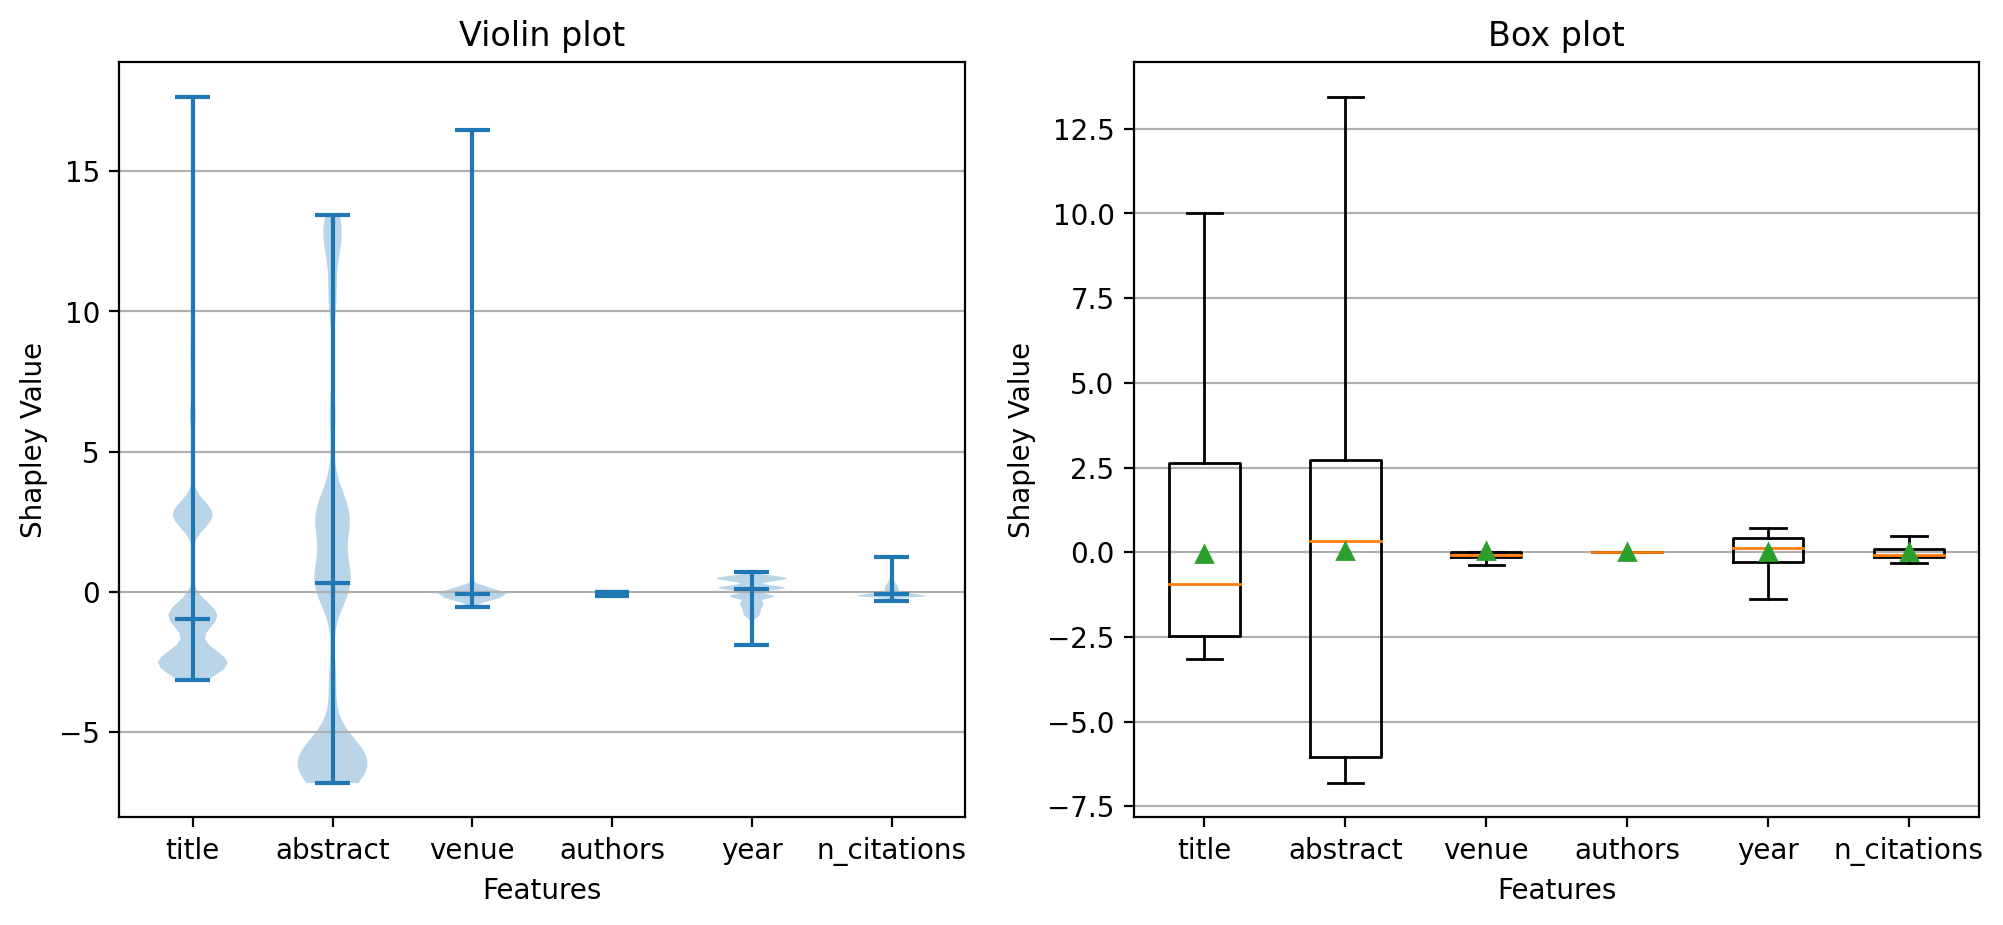

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=200)

# plot violin plot
axs[0].violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

# plot box plot
axs[1].boxplot(all_data, 
               showfliers=False, 
               showmeans=True,
               )
axs[1].set_title('Box plot')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['title', 'abstract', 'venue', 'authors', 'year', 'n_citations'])
    ax.set_xlabel('Features')
    ax.set_ylabel('Shapley Value')

plt.show()

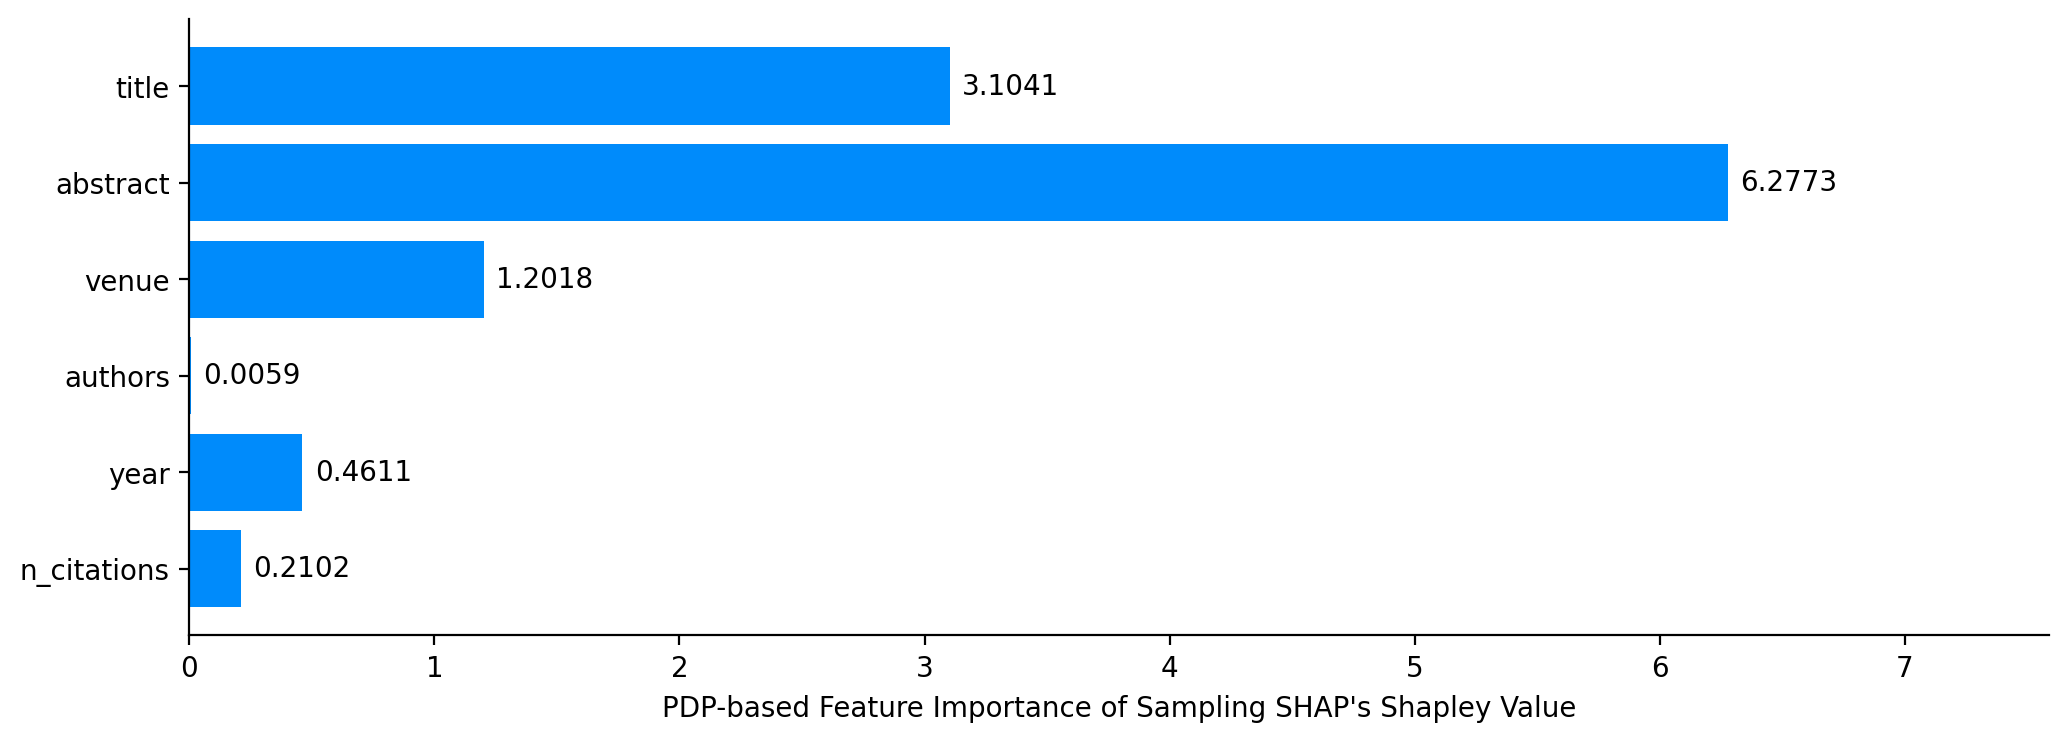

In [8]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12, 4), dpi=200)

# Example data
feature_names = ('title', 'abstract', 'venue', 'authors', 'year', 'n_citations')
y_pos = np.arange(len(feature_names))
# error = np.random.rand(len(feature_names))

# ax.xaxis.grid(True)
ax.barh(y_pos, pdp_based_fi, align='center', color='#008bfb')
ax.set_yticks(y_pos, labels=feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('PDP-based Feature Importance of Sampling SHAP\'s Shapley Value')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_, xmax = plt.xlim()
plt.xlim(0, xmax + 1)
for i, v in enumerate(pdp_based_fi):
    margin = 0.05
    ax.text(v + margin if v > 0 else margin, i, str(round(v, 4)), color='black', ha='left', va='center')

plt.show()

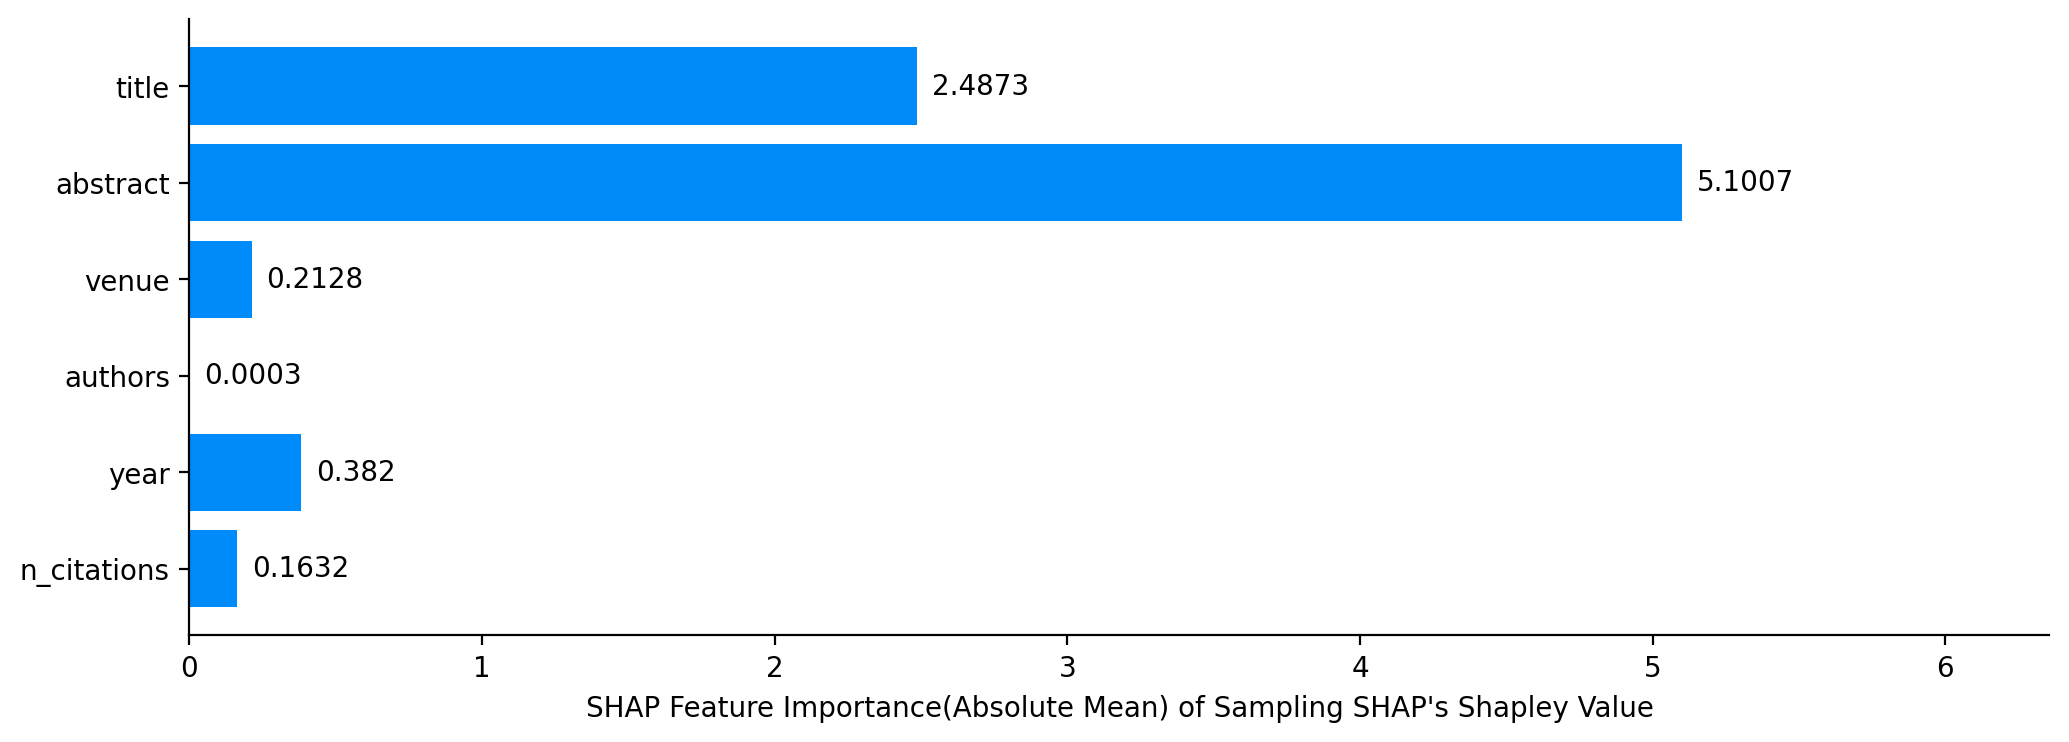

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12, 4), dpi=200)

# Example data
feature_names = ('title', 'abstract', 'venue', 'authors', 'year', 'n_citations')
y_pos = np.arange(len(feature_names))
# error = np.random.rand(len(feature_names))

# ax.xaxis.grid(True)
ax.barh(y_pos, sv_global_fi, align='center', color='#008bfb')
ax.set_yticks(y_pos, labels=feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('SHAP Feature Importance(Absolute Mean) of Sampling SHAP\'s Shapley Value')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_, xmax = plt.xlim()
plt.xlim(0, xmax + 1)
for i, v in enumerate(sv_global_fi):
    margin = 0.05
    ax.text(v + margin if v > 0 else margin, i, str(round(v, 4)), color='black', ha='left', va='center')

plt.show()

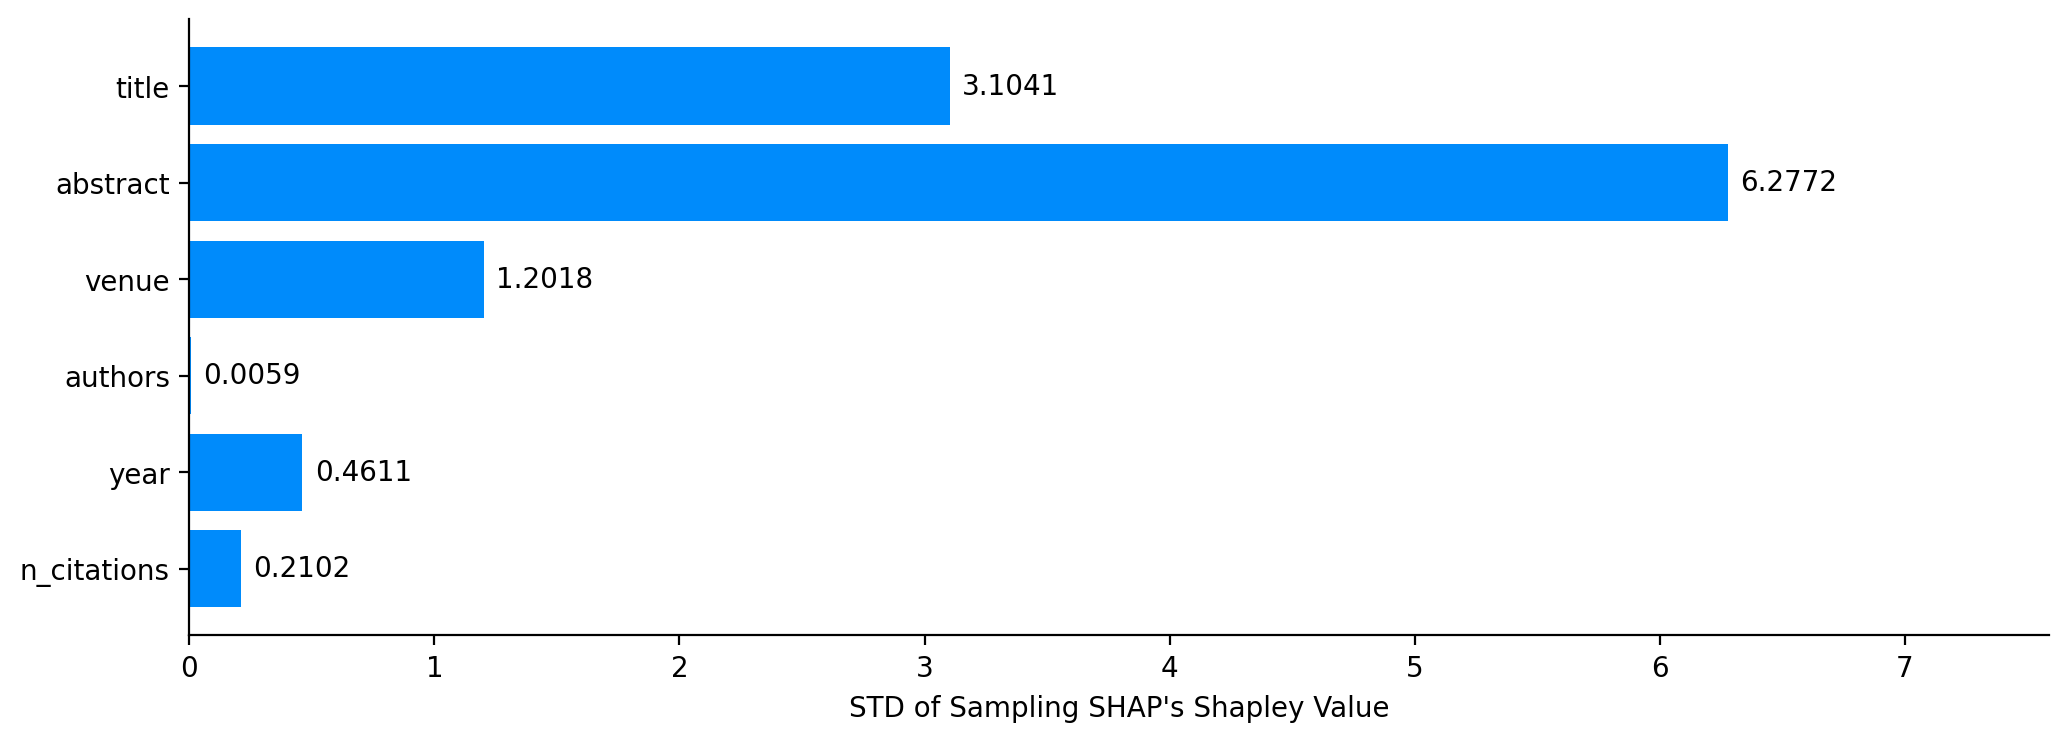

In [10]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12, 4), dpi=200)

# Example data
feature_names = ('title', 'abstract', 'venue', 'authors', 'year', 'n_citations')
y_pos = np.arange(len(feature_names))
# error = np.random.rand(len(feature_names))

# ax.xaxis.grid(True)
ax.barh(y_pos, std_fi, align='center', color='#008bfb')
ax.set_yticks(y_pos, labels=feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('STD of Sampling SHAP\'s Shapley Value')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

_, xmax = plt.xlim()
plt.xlim(0, xmax + 1)
for i, v in enumerate(std_fi):
    margin = 0.05
    ax.text(v + margin if v > 0 else margin, i, str(round(v, 4)), color='black', ha='left', va='center')

plt.show()